In [231]:
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [232]:
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder 
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,silhouette_score,confusion_matrix 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA 

In [233]:
data = pd.read_csv(r'c:\Github\Sol\the_data\us_covid.csv')
# r'c:\Github\Sol\the_data\data-lab-4-heart.csv'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52680 entries, 0 to 52679
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  52680 non-null  object 
 1   state            52680 non-null  object 
 2   tot_cases        52680 non-null  int64  
 3   conf_cases       29264 non-null  float64
 4   prob_cases       29192 non-null  float64
 5   new_case         52680 non-null  int64  
 6   pnew_case        48935 non-null  float64
 7   tot_death        52680 non-null  int64  
 8   conf_death       28749 non-null  float64
 9   prob_death       28749 non-null  float64
 10  new_death        52680 non-null  int64  
 11  pnew_death       48967 non-null  float64
 12  created_at       52680 non-null  object 
 13  consent_cases    43895 non-null  object 
 14  consent_deaths   44778 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 6.0+ MB


In [234]:
num_val = ['tot_cases', 'conf_cases', 'prob_cases', 'new_case', 'pnew_case', 'tot_death', 'conf_death','prob_death', 'new_death', 'new_death', 'pnew_death']
cat_val = ['submission_date', 'state', 'created_at', 'consent_cases', 'consent_deaths']

In [235]:
data.duplicated().sum()

0

In [236]:
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

conf_death         45.427107
prob_death         45.427107
prob_cases         44.586181
conf_cases         44.449506
consent_cases      16.676158
consent_deaths     15.000000
pnew_case           7.108960
pnew_death          7.048216
submission_date     0.000000
state               0.000000
tot_cases           0.000000
new_case            0.000000
tot_death           0.000000
new_death           0.000000
created_at          0.000000
dtype: float64

In [237]:
# mean_imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
# mode_imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

# data[['tot_cases', 'conf_cases', 'prob_cases', 'new_case', 'pnew_case', 'tot_death', 'conf_death','prob_death', 'new_death', 'new_death', 'pnew_death']] = mean_imp.fit_transform(data[['tot_cases', 'conf_cases', 'prob_cases', 'new_case', 'pnew_case', 'tot_death', 'conf_death','prob_death', 'new_death', 'new_death', 'pnew_death']])

# data[['submission_date', 'state', 'created_at', 'consent_cases', 'consent_deaths']] = mode_imp.fit_transform(data[['submission_date', 'state', 'created_at', 'consent_cases', 'consent_deaths']])

Gonnadrop all missing data because they represent a state

In [238]:
data = data.dropna()

In [239]:
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

submission_date    0.0
state              0.0
tot_cases          0.0
conf_cases         0.0
prob_cases         0.0
new_case           0.0
pnew_case          0.0
tot_death          0.0
conf_death         0.0
prob_death         0.0
new_death          0.0
pnew_death         0.0
created_at         0.0
consent_cases      0.0
consent_deaths     0.0
dtype: float64

In [240]:
data.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,2.406800e+04,2.406800e+04,24068.000000,24068.000000,24068.000000,24068.000000,24068.000000,24068.000000,24068.000000,24068.000000
mean,5.928959e+05,5.115505e+05,81345.447648,1823.258268,289.058542,9530.116669,8479.680364,1050.436305,21.594025,2.557005
std,7.541985e+05,6.763876e+05,123895.335197,4208.684066,778.048375,11543.261139,10625.259328,1483.513020,49.470092,26.248083
min,0.000000e+00,0.000000e+00,0.000000,-4803.000000,-6259.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,5.111675e+04,4.671400e+04,27.000000,79.000000,0.000000,912.750000,863.500000,0.000000,0.000000,0.000000
50%,2.905775e+05,2.444120e+05,18476.500000,577.000000,39.000000,4687.000000,4087.500000,283.000000,6.000000,0.000000
75%,8.688625e+05,7.555085e+05,122145.750000,1861.250000,250.000000,14502.750000,12648.000000,1640.250000,23.000000,2.000000
max,4.885289e+06,4.640489e+06,650437.000000,125572.000000,16929.000000,71408.000000,71408.000000,7177.000000,1178.000000,1021.000000


<AxesSubplot:title={'center':'Covid Correlation Matrix'}>

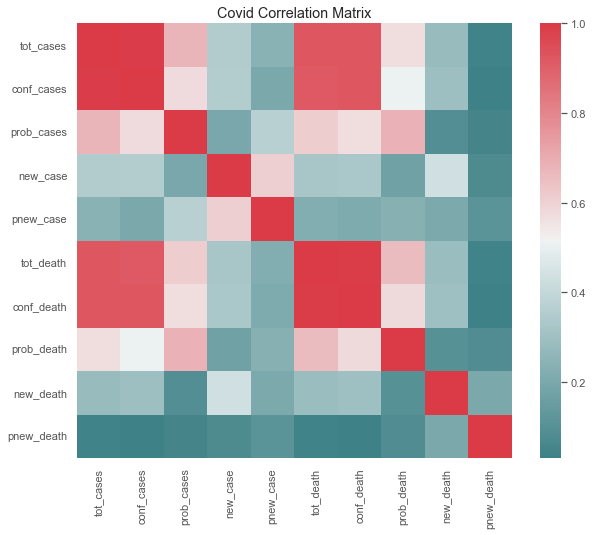

In [241]:
data_corr = data.corr()

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Covid Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(200,10, as_cmap=True), ax=ax, square=True)

In [242]:
le = LabelEncoder()
# data[['submission_date', 'state', 'created_at', 'consent_cases', 'consent_deaths']] = le.fit_transform(data[['submission_date', 'state', 'created_at', 'consent_cases', 'consent_deaths']])

orig_state = data.state

data.submission_date = le.fit_transform(data.submission_date)
data.state = le.fit_transform(data.state)
data.created_at = le.fit_transform(data.created_at)
data.consent_cases = le.fit_transform(data.consent_cases)
data.consent_deaths = le.fit_transform(data.consent_deaths)

le_state = data.state 

orig_st_dic = np.unique(orig_state)
le_st_dic = np.unique(le_state)

state_dic = dict(zip(orig_st_dic,le_st_dic))
state_dic


{'AL': 0,
 'AZ': 1,
 'CA': 2,
 'CO': 3,
 'CT': 4,
 'DE': 5,
 'FSM': 6,
 'GA': 7,
 'ID': 8,
 'IL': 9,
 'KY': 10,
 'MA': 11,
 'ME': 12,
 'MI': 13,
 'MP': 14,
 'MS': 15,
 'MT': 16,
 'NC': 17,
 'NE': 18,
 'NJ': 19,
 'NYC': 20,
 'OH': 21,
 'OK': 22,
 'OR': 23,
 'PR': 24,
 'RMI': 25,
 'TN': 26,
 'UT': 27,
 'VA': 28,
 'WI': 29,
 'WY': 30}

In [243]:
y = data.tot_cases 
x = data.drop(columns=['tot_cases'])

In [244]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

y = scaler.fit_transform(np.array(y).reshape(-1,1))


In [245]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)



In [246]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

y_true = y_test 

y_pred = linreg.predict(x_test)

scr_r2 = r2_score(y_true,y_pred).round(3)

scr_r2

1.0

In [247]:
ranfor = RandomForestRegressor(n_estimators=100, n_jobs=-1, criterion='squared_error', random_state=42)

ranfor.fit(x_train,y_train)

y_pred = ranfor.predict(x_test)

scr_mse = mean_squared_error(y_test,y_pred)

modperf = pd.DataFrame( 
    [ 
        'RandomForestRegressor', scr_mse
    ]
).transpose()

modperf.columns = ['Method', 'Test RanFor']

modperf

C:\Users\amunv\AppData\Local\Temp\ipykernel_12504\3699821088.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranfor.fit(x_train,y_train)


,Method,Test RanFor
0,RandomForestRegressor,0.000021
